# Deep Learning Project Notebook

### Import modulde

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import download_data,model,train,evaluate,preprocessed,loss
import importlib
import tensorflow as tf



In [5]:
importlib.reload(download_data)
importlib.reload(model)
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(preprocessed)
importlib.reload(loss)

<module 'src.loss' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\loss.py'>

### Download_data

In [ ]:
download_data.download_data()

### Process data

In [4]:
num_input = preprocessed.preprocess_data_features()
temp,dev = preprocessed.split_dataset_dev()

## Declare Model

### Model 1 : one layer model

In [29]:
layers = []
input_num = num_input
batch_size = 1024
epoch = 10
learning_rate = 0.001

Epoch 1/10


224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7743 - loss: 0.5228 - val_accuracy: 0.8529 - val_loss: 0.3831
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3817 - val_accuracy: 0.8575 - val_loss: 0.3664
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3657 - val_accuracy: 0.8598 - val_loss: 0.3570
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3571 - val_accuracy: 0.8612 - val_loss: 0.3517
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3518 - val_accuracy: 0.8612 - val_loss: 0.3482
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3484 - val_accuracy: 0.8611 - val_loss: 0.3457
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3460 - val_accuracy: 0.8609 - val_loss: 0.3437
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3442 - val_accuracy: 0.8607 - val_

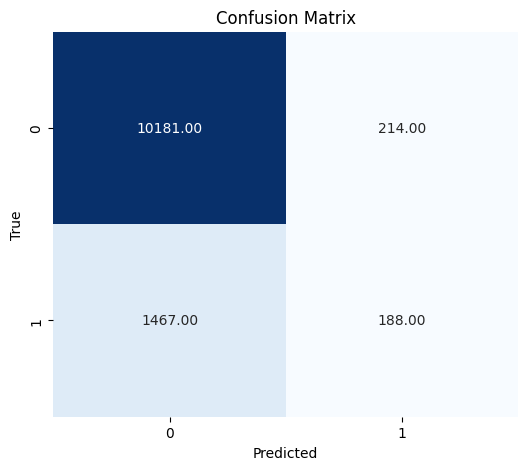

{'accuracy': 0.8604979253112033,
 'f1_score': 0.18279047156052503,
 'false_positive': 214.0,
 'false_negative': 1467.0}

In [30]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
model_one_layer = model.create_sequential_model(input_num,hidden_layers=layers,dropout_rates=0.1)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)


history,test_data = train.train_model(temp,model_one_layer,criterion,optimizer_adam,epoch,batch_size=batch_size)

evaluate.evaluate_model(model_one_layer,test_data)

### Model 2 : MLP

Epoch [1/100], Loss: 0.7955
Epoch [2/100], Loss: 0.7967
Epoch [3/100], Loss: 0.7959
Epoch [4/100], Loss: 0.7961
Epoch [5/100], Loss: 0.7951
Epoch [6/100], Loss: 0.7955
Epoch [7/100], Loss: 0.7957
Epoch [8/100], Loss: 0.7951
Epoch [9/100], Loss: 0.7948
Epoch [10/100], Loss: 0.7953
Epoch [11/100], Loss: 0.7951
Epoch [12/100], Loss: 0.7945
Epoch [13/100], Loss: 0.7957
Epoch [14/100], Loss: 0.7941
Epoch [15/100], Loss: 0.7943
Epoch [16/100], Loss: 0.7946
Epoch [17/100], Loss: 0.7951
Epoch [18/100], Loss: 0.7943
Epoch [19/100], Loss: 0.7940
Epoch [20/100], Loss: 0.7941
Epoch [21/100], Loss: 0.7939
Epoch [22/100], Loss: 0.7946
Epoch [23/100], Loss: 0.7945
Epoch [24/100], Loss: 0.7937
Epoch [25/100], Loss: 0.7940
Epoch [26/100], Loss: 0.7947
Epoch [27/100], Loss: 0.7931
Epoch [28/100], Loss: 0.7933
Epoch [29/100], Loss: 0.7924
Epoch [30/100], Loss: 0.7934
Epoch [31/100], Loss: 0.7933
Epoch [32/100], Loss: 0.7931
Epoch [33/100], Loss: 0.7929
Epoch [34/100], Loss: 0.7932
Epoch [35/100], Loss: 0

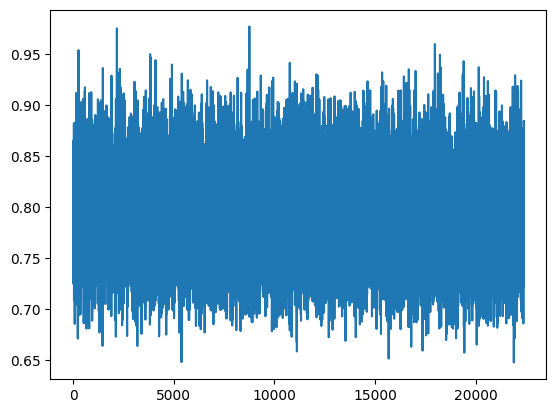

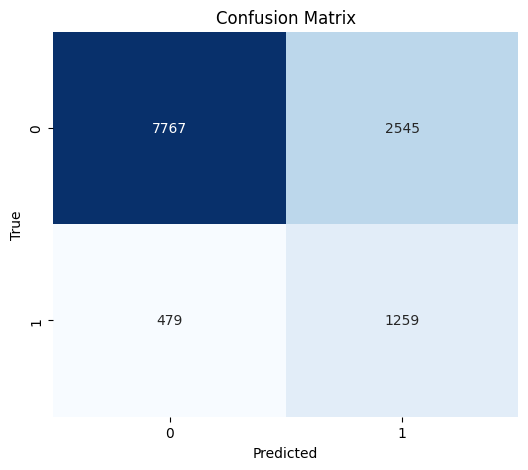

{'accuracy': 0.749045643153527,
 'f1_score': 0.4543486106098881,
 'false_positive': 2545,
 'false_negative': 479}

In [6]:
hidden_layers = [200,200,70]
model_mlp = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.2)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer = optim.Adam(model_one_layer.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses,test_data = train.train_model(temp,model_one_layer,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)

evaluate.evaluate_model(model_one_layer,test_data)

## Download Dataset kaggle

In [6]:
df_raw = pd.read_csv("C:/Users/coren/Projet Deep Learning/CS230/local/data/raw/df_2011")

### Process dataset

In [7]:
from src import process_oversampling,process_datasets,process_datasets_v2

In [8]:
importlib.reload(process_datasets)
importlib.reload(process_oversampling)
importlib.reload(process_datasets_v2)

<module 'src.process_datasets_v2' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\process_datasets_v2.py'>

In [9]:
temp_2011_1 = process_datasets_v2.process_dataset(df_raw)
temp_2011_2 = process_oversampling.process_part_2(temp_2011_1)
temp_2011,dev_2011 = process_oversampling.undersample_train_test_NM(temp_2011_1)

In [10]:
layers = [40]
input_num = 2
batch_size = 1024
epoch = 10
learning_rate = 0.001

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
model_2011 = model.create_sequential_model(input_num,hidden_layers=layers,dropout_rates=0.1)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)


history,test_data = train.train_model(temp_2011,model_2011,criterion,optimizer_adam,epoch,batch_size=batch_size)


evaluate.evaluate_model(model_2011,test_data)

Epoch 1/10


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6853 - loss: 0.7394 - val_accuracy: 1.0000 - val_loss: 0.4066
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7158 - loss: 0.6761 - val_accuracy: 1.0000 - val_loss: 0.2244
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.6212 - val_accuracy: 1.0000 - val_loss: 0.1536
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.5491 - val_accuracy: 1.0000 - val_loss: 0.1134
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.4727 - val_accuracy: 1.0000 - val_loss: 0.0866
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9879 - loss: 0.4040 - val_accuracy: 1.0000 - val_loss: 0.0678
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.3443 - val_accuracy: 1.0000 - val_loss: 0.0538
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.2936 - val_accuracy: 1.0000 - val_loss: 0.0434
Epo

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


<_SkipDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
4152
True


c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [40]:
print(test_data)

<_SkipDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
